In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc 
import numpy as np 
import pandas as pd 
import os, sys 
sys.path.append('../../src')

In [3]:
from spaceoracle.tools.network import HumanMelanomaRegulatoryNetwork
co_grn = HumanMelanomaRegulatoryNetwork()

2024-12-04 17:34:36.169639: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data/HumanMelanomaRNA.h5ad')
adata

AnnData object with n_obs × n_vars = 4804 × 3000
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'sex', 'cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'cluster_cat'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_colors', 'hvg'
    obsm: 'spatial'
    layers: 'imputed_count', 'normalized_count'

In [5]:
from spaceoracle.oracles import SpaceTravLR

star = SpaceTravLR(
    adata, 
    save_dir='/ix/djishnu/shared/djishnu_kor11/models_melanoma',
    annot='cluster_cat',
    grn=co_grn
)

star.adata

AnnData object with n_obs × n_vars = 4804 × 3000
    obs: 'cluster_cat'
    obsm: 'spatial'
    layers: 'imputed_count', 'normalized_count'

In [6]:
[x for x in adata.var_names if 'CXCL' in x]

['CXCL9', 'CXCL10', 'CXCL11', 'CXCL13']

In [7]:
from spaceoracle.models.parallel_estimators import SpatialCellularProgramsEstimator

# test run to make sure everything is working

estimator = SpatialCellularProgramsEstimator(
    adata=star.adata,
    target_gene='SERPINH1',
    layer='imputed_count',
    cluster_annot='cluster_cat', 
    grn=co_grn
)

estimator.fit(num_epochs=200, threshold_lambda=1e-12, learning_rate=5e-4)


human


Fitting SERPINH1 with 45 modulators
	10 Transcription Factors
	26 Ligand-Receptor Pairs
	9 TranscriptionFactor-Ligand Pairs
0: 0.8595 | 0.2639
1: 0.9949 | 0.9901
2: 0.9933 | 0.7056
3: -0.4632 | 0.4738
4: 0.9635 | -1.5733
5: 0.9089 | -1.8044
6: 0.9170 | 0.9554
7: 0.7222 | 0.5382
8: 0.9999 | 0.6169
9: 0.5944 | 0.5099
10: 0.6859 | 0.4469
11: 0.8819 | 0.7244


In [8]:
adata.layers['imputed_count'] = star.adata.layers['imputed_count']
adata.write_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data/HumanMelanomaRNA.h5ad')

see train.py and submit with run.sh

In [10]:
# To view training progress

from spaceoracle.tools.network import HumanMelanomaRegulatoryNetwork
from spaceoracle import SpaceTravLR

co_grn = HumanMelanomaRegulatoryNetwork()

adata_train = sc.read_h5ad(
    '/ix/djishnu/shared/djishnu_kor11/training_data/HumanMelanomaRNA.h5ad')

star = SpaceTravLR(
    adata=adata_train,
    annot='cluster_cat', 
    grn=co_grn,
    max_epochs=200, 
    learning_rate=5e-4, 
    spatial_dim=64,
    batch_size=512,
    threshold_lambda=1e-12,
    test_mode=False,
    save_dir='/ix/djishnu/shared/djishnu_kor11/models_melanoma'
)

star.run()


Fitting EGLN3 with 58 modulators
	12 Transcription Factors
	26 Ligand-Receptor Pairs
	20 TranscriptionFactor-Ligand Pairs
0: 0.9737 | 0.8522
1: 0.8535 | 0.7356
2: 0.6353 | 0.4960
3: 0.9075 | 0.7526
4: 0.8567 | 0.3782
5: 0.9227 | 0.7171
6: 0.9086 | -12.1919
7: 0.6387 | 0.3351
8: 0.9980 | -4.4737
9: 0.6577 | 0.5270
10: 0.7577 | 0.4534
11: 0.8884 | 0.7532
Fitting CCDC3 with 71 modulators
	18 Transcription Factors
	26 Ligand-Receptor Pairs
	27 TranscriptionFactor-Ligand Pairs
0: 0.9962 | 0.8148
1: 0.7339 | 0.4678
2: 0.5310 | 0.4417
3: 0.8721 | 0.6350
4: 0.8664 | -80.5189
5: 0.9935 | 0.7406
6: -1.6611 | 0.9679
7: 0.4256 | 0.2913
8: 0.9894 | 0.8922
9: 0.8720 | 0.6709
10: 0.5413 | 0.3300
11: 0.7398 | 0.6838
Fitting PHACTR2-AS1 with 75 modulators
	17 Transcription Factors
	26 Ligand-Receptor Pairs
	32 TranscriptionFactor-Ligand Pairs
0: 0.9994 | 0.9778
1: 0.9410 | 0.9054
2: 0.5910 | 0.4820
3: 0.8503 | 0.7741
4: 0.6987 | 0.7322
5: 0.7674 | 0.7316
6: 0.7093 | -26.0823
7: 0.4075 | 0.2080
8: 0.936

CD8_T 0.3946226021510469
tumour_1 0.41218386483368263
T_reg 0.44260930301528373
CD4_T 0.4828307195676677
mono-mac 0.42806408394414264
plasma 0.4738343083712407
pDC 0.4902868141545393
mDC 0.5007036062624795
fibroblast 0.4314416166655334
tumour_2 0.5695413034076464
B_cell 0.6306232546985656
endothelial 0.5371690340667362


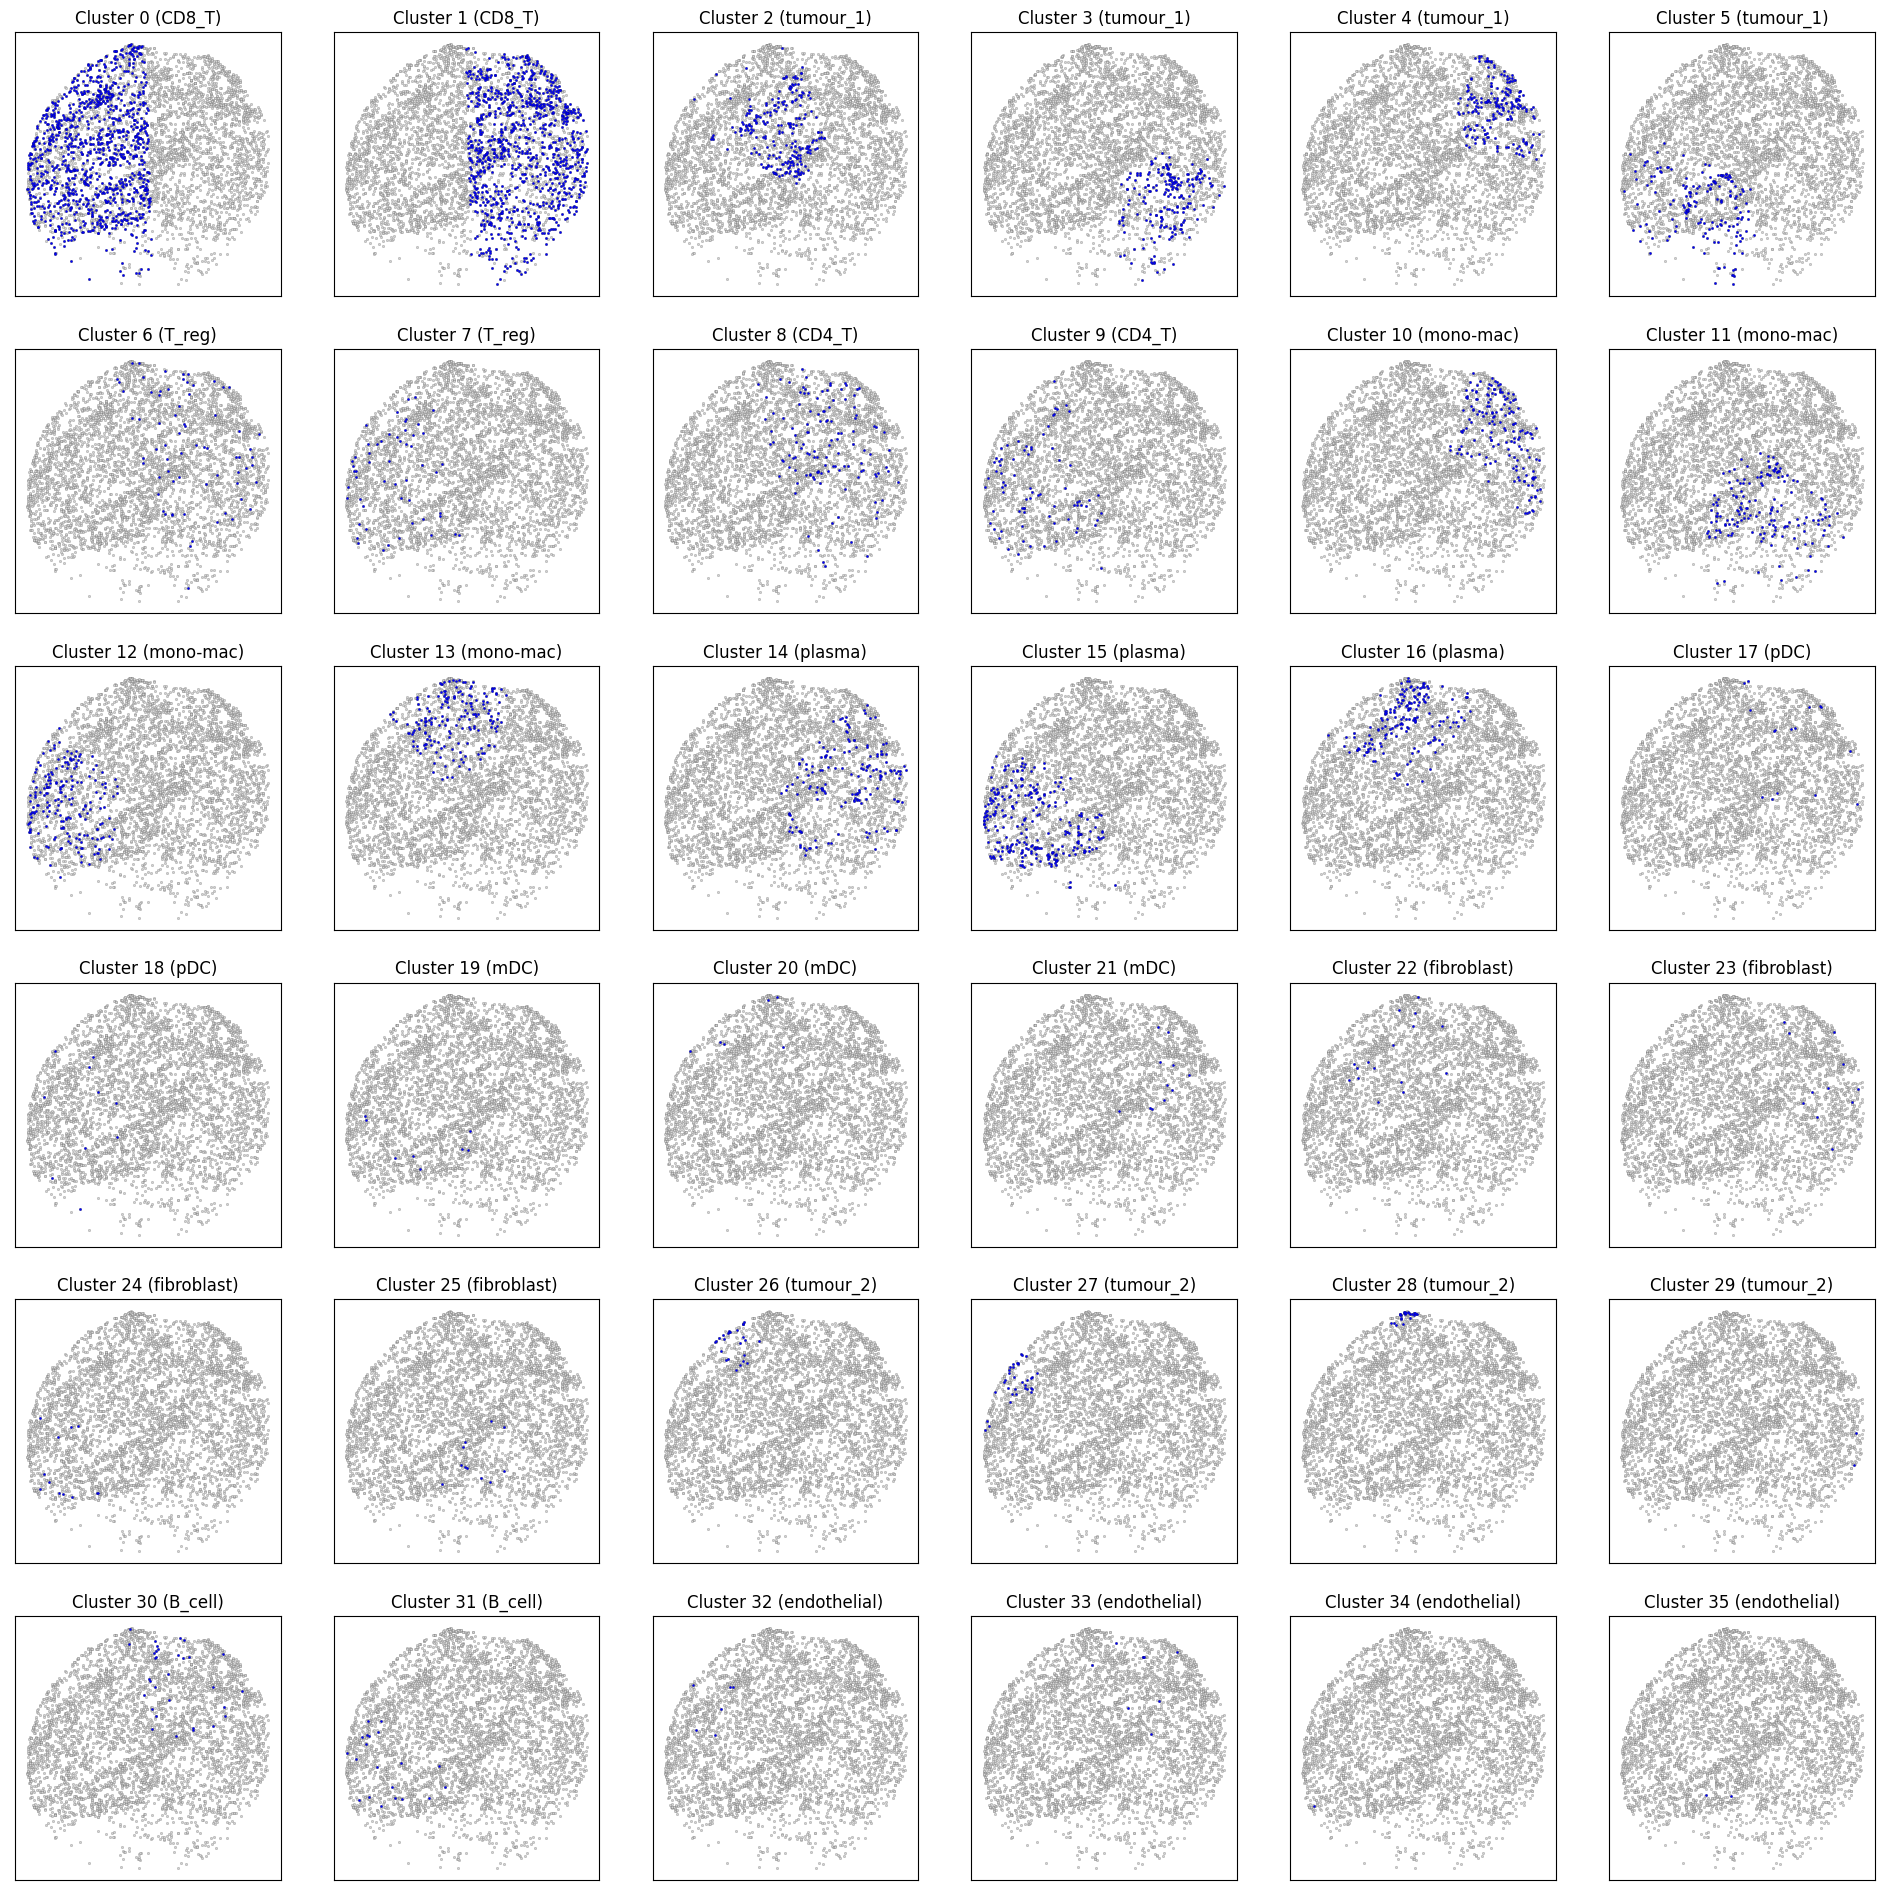

In [ ]:
# to plot before training is finished 

from spaceoracle.plotting.niche import get_grid_layout
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

seed = 1
score_thresh = 0.2

clusters = adata.obs.cluster.unique()
betas = estimator.betadata.values
cell_types = adata.obs.cluster
labels = np.full(len(betas), -1, dtype=int)
range_n_clusters = range(2, 5)  # Range of clusters to try

for cell_type in clusters:

    subset_idxs = np.where(cell_types == cell_type)[0]
    subset = betas[subset_idxs]

    best_score = -1
    best_n_clusters = 2

    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
        cluster_labels = kmeans.fit_predict(subset)
        if len(set(cluster_labels)) > 1: 
            score = silhouette_score(subset, cluster_labels)
            if score > best_score:
                best_score = score
                best_n_clusters = n_clusters
    
    if best_score < score_thresh:  
        best_n_clusters = 1

    print(cell_type, best_score)

    best_kmeans = KMeans(n_clusters=best_n_clusters, random_state=seed)
    best_labels = best_kmeans.fit_predict(subset)

    labels[subset_idxs] = best_labels + np.max(labels) + 1

rows, cols = get_grid_layout(len(np.unique(labels)), preferred_cols=None)
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
axes = axes.flatten()

for i in np.unique(labels):
    cluster_mask = labels == i
    celltype = cell_types[cluster_mask][0]
    
    axes[i].scatter(
        adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1],
        c='lightgray', s=3, edgecolors='black', linewidth=0.1
    )
    
    axes[i].scatter(
        adata.obsm['spatial'][cluster_mask, 0], adata.obsm['spatial'][cluster_mask, 1],
        c='blue', s=3, edgecolors='black', linewidth=0.1
    )
    
    axes[i].set_title(f'Cluster {i} ({celltype})')
    axes[i].set_xticks([])  
    axes[i].set_yticks([])  

for j in range(i + 1, rows * cols):
    axes[j].axis('off')